In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crosssec_df = pd.read_csv('/content/drive/My Drive/ANN resources/ANNbeamtotal.csv')

In [ ]:
crosssec_df

,index,concrete grade,yield strength,span length,slab thickness,beam width,beam depth,safe or fail
0,1,15,500,3.0,0.15,0.2,0.3,1
1,2,15,500,3.1,0.15,0.2,0.3,1
2,3,15,500,3.2,0.15,0.2,0.3,1
3,4,15,500,3.3,0.15,0.2,0.3,1
4,5,15,500,3.4,0.15,0.2,0.3,1
...,...,...,...,...,...,...,...,...
9225,9226,60,500,9.6,0.15,0.5,0.6,1
9226,9227,60,500,9.7,0.15,0.5,0.6,1
9227,9228,60,500,9.8,0.15,0.5,0.6,1
9228,9229,60,500,9.9,0.15,0.5,0.6,1


In [ ]:
# prompt: random shuffle the data

crosssec_df_shuffle = crosssec_df.sample(frac=1).reset_index(drop=True)


In [ ]:
crosssec_df_shuffle.head(5)

,index,concrete grade,yield strength,span length,slab thickness,beam width,beam depth,safe or fail
0,5926,30,500,6.2,0.15,0.3,0.40,1
1,5883,25,500,9.0,0.15,0.3,0.40,0
2,4016,45,500,6.9,0.15,0.5,0.55,1
3,4225,60,500,6.5,0.15,0.5,0.55,1
4,7191,20,500,4.9,0.15,0.4,0.50,1


In [ ]:
crosssec_df_shuffle.tail(9)

,index,concrete grade,yield strength,span length,slab thickness,beam width,beam depth,safe or fail
9221,996,35,500,3.1,0.15,0.30,0.35,1
9222,3382,50,500,7.4,0.15,0.45,0.50,1
9223,2446,35,500,6.1,0.15,0.40,0.45,1
9224,5852,25,500,5.9,0.15,0.30,0.40,1
9225,8826,35,500,5.1,0.15,0.50,0.60,1
9226,1847,45,500,3.0,0.15,0.35,0.40,1
9227,4164,55,500,7.5,0.15,0.50,0.55,1
9228,4351,20,500,4.9,0.15,0.55,0.60,1
9229,4946,60,500,7.6,0.15,0.55,0.60,1


<Axes: xlabel='beam width', ylabel='beam depth'>

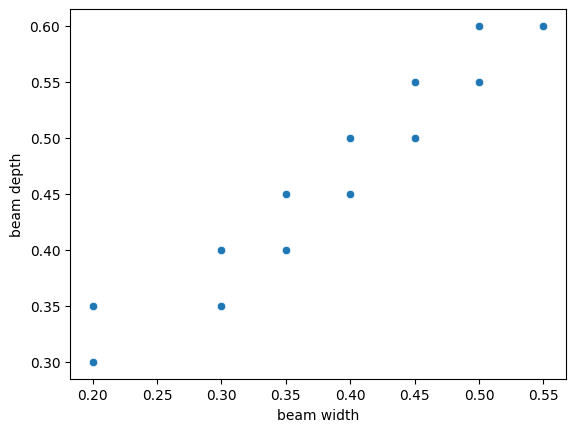

In [ ]:
sns.scatterplot(x = 'beam width', y = 'beam depth', data = crosssec_df)

<Axes: >

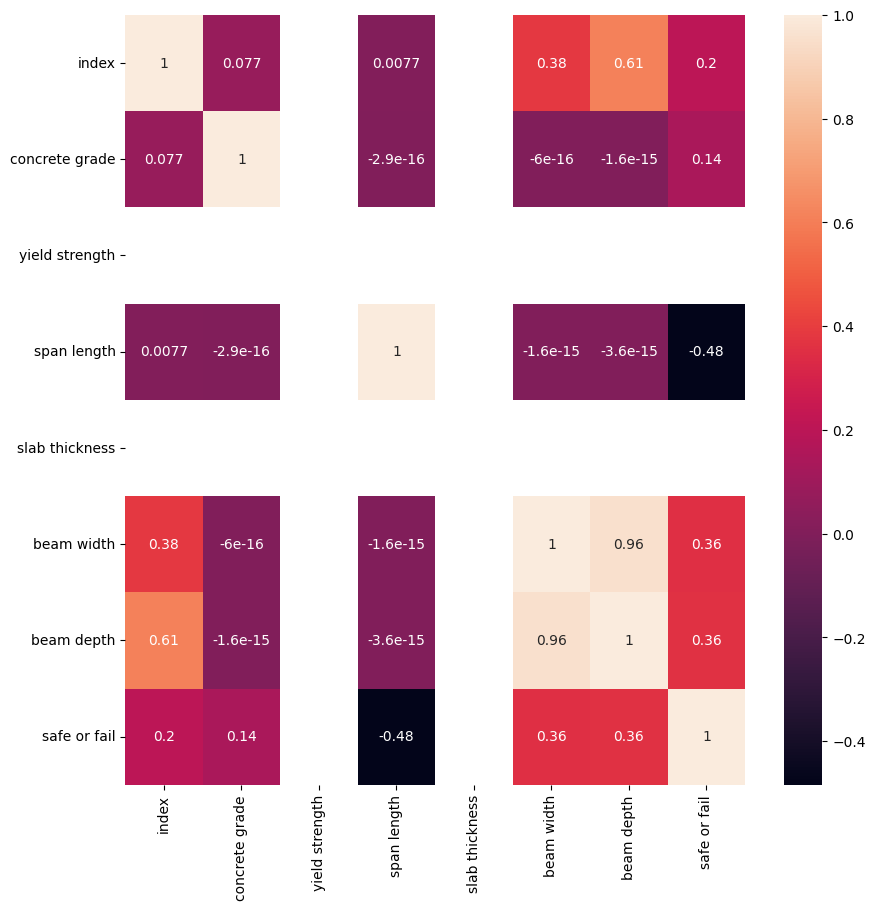

In [ ]:
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(crosssec_df.corr(), annot = True)


In [ ]:
# prompt: drop column

crosssec_df_shuffle = crosssec_df_shuffle.drop(['index', 'slab thickness','yield strength'], axis=1)


<Axes: >

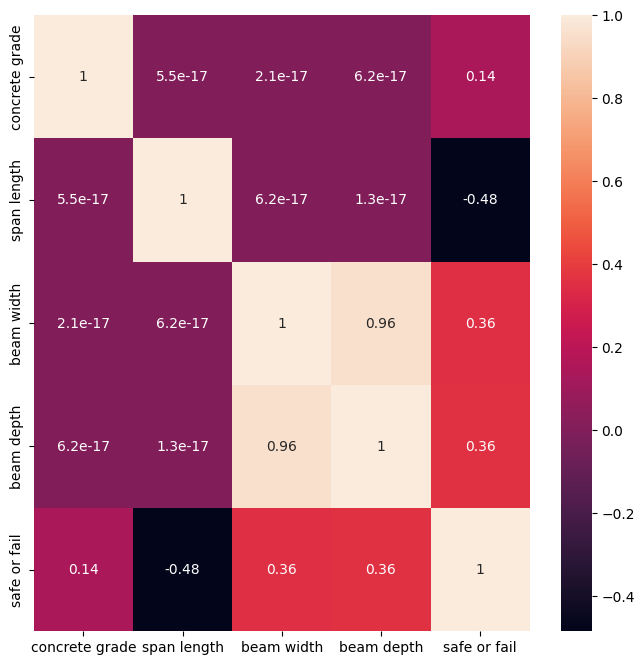

In [ ]:
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(crosssec_df_shuffle.corr(), annot = True)

array([[<Axes: title={'center': 'concrete grade'}>,
        <Axes: title={'center': 'span length'}>],
       [<Axes: title={'center': 'beam width'}>,
        <Axes: title={'center': 'beam depth'}>],
       [<Axes: title={'center': 'safe or fail'}>, <Axes: >]], dtype=object)

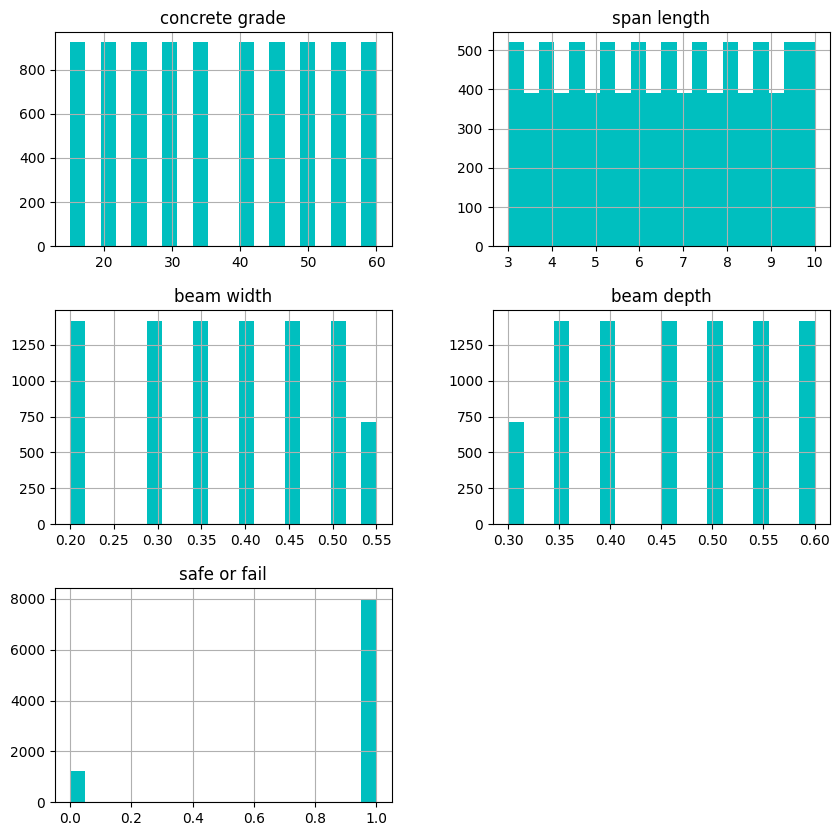

In [ ]:
crosssec_df_shuffle.hist(bins=20,figsize=(10,10), color ='c')

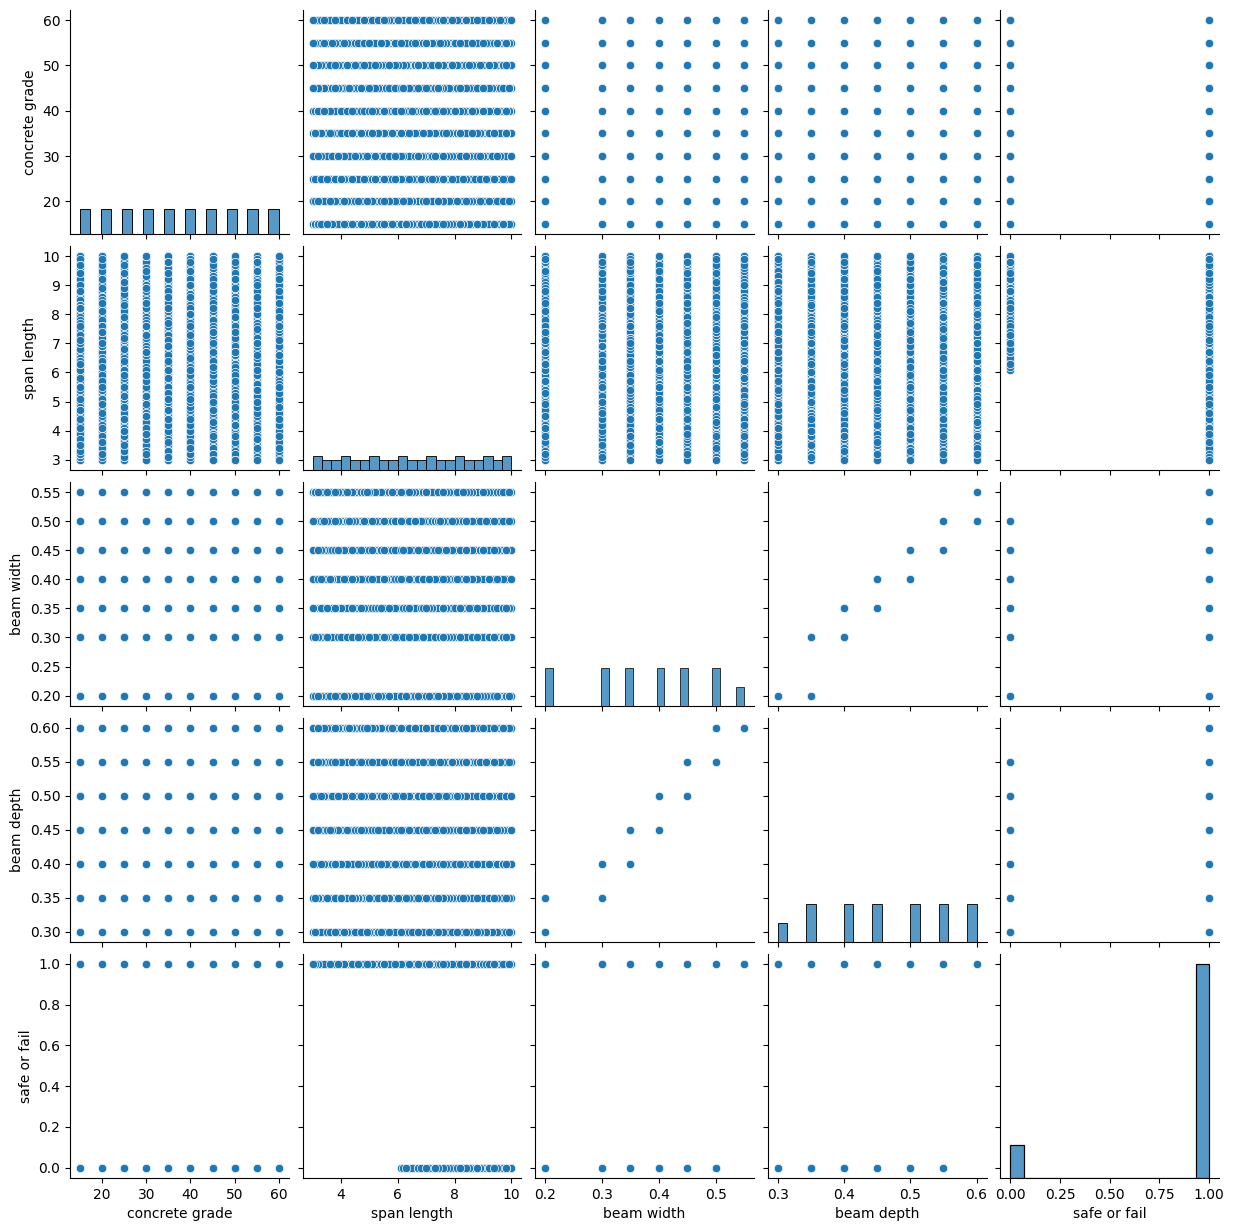

In [ ]:
sns.pairplot(crosssec_df_shuffle)

In [ ]:
# prompt: select X feature except 'beam width' & 'beam depth' column

X = crosssec_df_shuffle[['concrete grade','span length','safe or fail','beam width']]


In [ ]:
X

,concrete grade,span length,safe or fail,beam width
0,30,6.2,1,0.30
1,25,9.0,0,0.30
2,45,6.9,1,0.50
3,60,6.5,1,0.50
4,20,4.9,1,0.40
...,...,...,...,...
9225,35,5.1,1,0.50
9226,45,3.0,1,0.35
9227,55,7.5,1,0.50
9228,20,4.9,1,0.55


In [ ]:
Y = crosssec_df_shuffle[[ 'beam depth']]
Y

,beam depth
0,0.40
1,0.40
2,0.55
3,0.55
4,0.50
...,...
9225,0.60
9226,0.40
9227,0.55
9228,0.60


In [ ]:
X.shape

(9230, 4)

In [ ]:
Y.shape

(9230, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
Y_scaled = scaler.fit_transform(Y)

In [ ]:
X_scaled

array([[0.33333333, 0.45714286, 1.        , 0.28571429],
       [0.22222222, 0.85714286, 0.        , 0.28571429],
       [0.66666667, 0.55714286, 1.        , 0.85714286],
       ...,
       [0.88888889, 0.64285714, 1.        , 0.85714286],
       [0.11111111, 0.27142857, 1.        , 1.        ],
       [1.        , 0.65714286, 1.        , 1.        ]])

In [ ]:
Y_scaled

array([[0.33333333],
       [0.33333333],
       [0.83333333],
       ...,
       [0.83333333],
       [1.        ],
       [1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_Test = train_test_split(X_scaled,Y_scaled,test_size = 0.02)

In [ ]:
X_train.shape

(9045, 4)

In [ ]:
X_test.shape

(185, 4)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),

    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=600, activation='relu',
                          kernel_initializer='he_normal'),
                          #kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dropout(0.2),

    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=300, activation='relu',
                          kernel_initializer='he_normal'),
                          #kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dropout(0.3),

    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=300, activation='relu',
                          kernel_initializer='he_normal'),
                         # kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dropout(0.15),

    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=300, activation='relu',
                          kernel_initializer='he_normal'),
                         # kernel_regularizer =tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dropout(0.15),

    tf.keras.layers.Dense(units=1, activation='linear'),
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 600)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         180,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             301 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,201 (1.39 MB)

 Trainable params: 364,201 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,  beta_1=0.9 , beta_2=0.999)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,  beta_1= 0.9 , beta_2=0.999)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer=optimizer ,loss='mean_squared_error', metrics=["RootMeanSquaredError"])
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
epohs_hist = model.fit(X_train,Y_train, epochs=100, validation_split = 0.02, callbacks=[lr_scheduler,early_stopping], batch_size =32)



Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - RootMeanSquaredError: 7.0004 - loss: 74.0232 - val_RootMeanSquaredError: 0.0879 - val_loss: 0.0077 - learning_rate: 0.0100
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - RootMeanSquaredError: 0.1334 - loss: 0.0179 - val_RootMeanSquaredError: 0.0861 - val_loss: 0.0074 - learning_rate: 0.0100
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.0913 - loss: 0.0083 - val_RootMeanSquaredError: 0.1090 - val_loss: 0.0119 - learning_rate: 0.0100
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.0971 - loss: 0.0094 - val_RootMeanSquaredError: 0.1044 - val_loss: 0.0109 - learning_rate: 0.0100
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.0880 - loss: 0.0078 - val_RootMeanSquaredError: 0.0918 - val_loss: 0.0084 - learning_rate: 0.0100
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.0845 - loss: 0.0071 - val_RootMea

In [ ]:
epohs_hist.history.keys()

dict_keys(['RootMeanSquaredError', 'loss', 'val_RootMeanSquaredError', 'val_loss', 'learning_rate'])

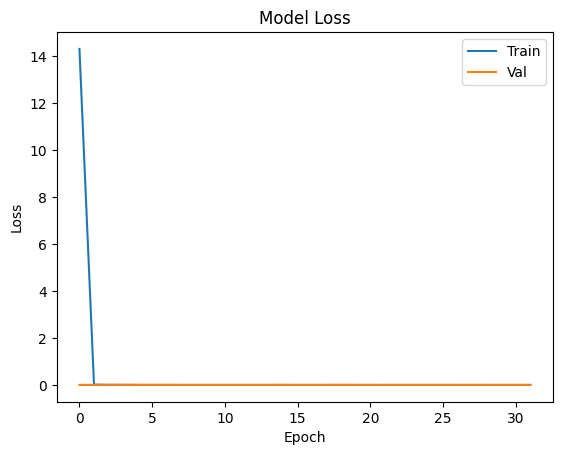

In [ ]:
plt.plot(epohs_hist.history['loss'])
plt.plot(epohs_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0, 0.5, 'Predictions')

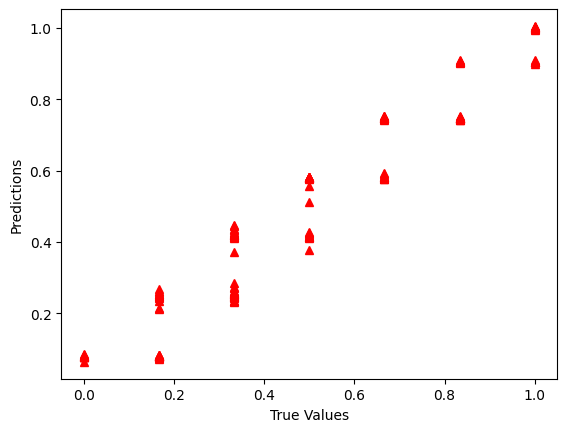

In [ ]:
plt.plot( Y_Test , y_pred,"^",color ='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
y_predict_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(Y_Test)

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

185

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.024 
MSE = 0.0005923268602279564 
MAE = 0.02341893573065062 
R2 = 0.9272569862342723 
Adjusted R2 = 0.9256404748172562


In [ ]:
# prompt: get the table chart y predict vs y test of beam width and beam depth

import pandas as pd

# Create a DataFrame with the predicted and actual values
df = pd.DataFrame({'Beam Depth Prediction': y_predict_orig.flatten(), #Flatten converts the column vector to a 1D array
                   'Beam Depth Actual': y_test_orig.flatten()}) #Flatten converts the column vector to a 1D array

# Display the table
print(df)

     Beam Depth Prediction  Beam Depth Actual
0                 0.324586               0.30
1                 0.323767               0.35
2                 0.324386               0.30
3                 0.428530               0.40
4                 0.325344               0.30
..                     ...                ...
180               0.373331               0.40
181               0.475466               0.50
182               0.425458               0.45
183               0.524431               0.55
184               0.526247               0.50

[185 rows x 2 columns]


In [ ]:
y_pred1 = model.predict(X_train)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(0, 0.5, 'Predictions')

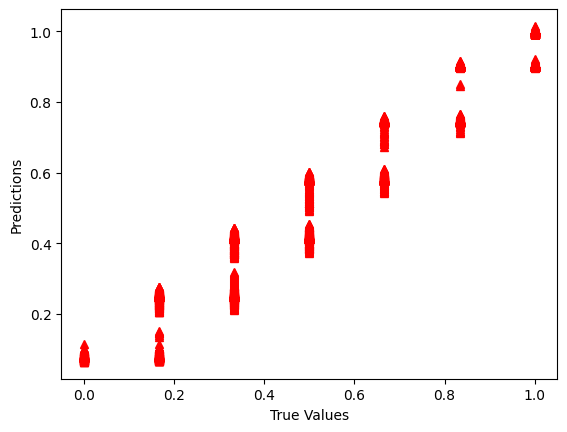

In [ ]:
plt.plot( Y_train , y_pred1,"^",color ='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
y_predict1_orig = scaler.inverse_transform(y_pred1)
y_train_orig = scaler.inverse_transform(Y_train)

In [ ]:
k = X_train.shape[1]
n = len(X_train)
n

9045

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_train_orig, y_predict1_orig)),'.3f'))
MSE = mean_squared_error(y_train_orig, y_predict1_orig)
MAE = mean_absolute_error(y_train_orig, y_predict1_orig)
r2 = r2_score(y_train_orig, y_predict1_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.024 
MSE = 0.0005702759077978131 
MAE = 0.022797933911143774 
R2 = 0.9360451322368708 
Adjusted R2 = 0.9360168336228163


In [ ]:
X_train_orig = scaler.inverse_transform(X_train)
X_train_orig

array([[0.43333333, 0.48      , 0.6       , 0.42857143],
       [0.53333333, 0.52714286, 0.6       , 0.6       ],
       [0.53333333, 0.39428571, 0.6       , 0.42857143],
       ...,
       [0.4       , 0.45857143, 0.6       , 0.55714286],
       [0.53333333, 0.32571429, 0.6       , 0.51428571],
       [0.33333333, 0.38142857, 0.6       , 0.42857143]])

In [ ]:
import pandas as pd

# Create a DataFrame with the predicted and actual values
df = pd.DataFrame({'Beam Depth Prediction': y_predict1_orig.flatten(), #Flatten converts the column vector to a 1D array
                   'Beam Depth Actual': y_train_orig.flatten()}) #Flatten converts the column vector to a 1D array

# Display the table
print(df)

      Beam Depth Prediction  Beam Depth Actual
0                  0.424067               0.40
1                  0.600050               0.60
2                  0.425278               0.40
3                  0.320903               0.30
4                  0.475087               0.50
...                     ...                ...
9040               0.525308               0.55
9041               0.372908               0.35
9042               0.570330               0.55
9043               0.525054               0.50
9044               0.423239               0.45

[9045 rows x 2 columns]


In [ ]:
# Assuming your external test data is in a CSV file named 'external_test_data.csv'
# and it has columns named 'concrete grade', 'span length', 'safe or fail', 'beam width', and 'beam depth'
external_test_df = pd.read_csv('/content/drive/My Drive/ANN resources/externaltest.csv')  # Replace with your file path

# Extract the input features from the external test data, ensuring the order matches the training data
X_external_test = external_test_df[['concrete grade', 'span length', 'safe or fail', 'beam width']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled_test = scaler.fit_transform(X_external_test)

# Predict beam depth using the trained model
y_external_pred = model.predict(X_scaled_test)

# Create a new scaler for the output
output_scaler = MinMaxScaler()
# Fit the scaler using the training data
output_scaler.fit(y_train_orig) # Assuming you have y_train_orig from the training data
y_external_pred_org = output_scaler.inverse_transform(y_external_pred)

# Create a DataFrame with the predicted beam depths for the external test data
df_external_pred = pd.DataFrame({'Beam Depth Prediction': y_external_pred.flatten()})

# Display the predicted beam depths for the external test data
print(df_external_pred)

In [ ]:
# prompt: extrct prediction and traget data for test set including input featres

# Assuming you have X_test, Y_Test, and y_pred from your previous code

# Inverse transform the scaled data to get the original values
X_test_orig = scaler.inverse_transform(X_test)
y_test_orig = scaler.inverse_transform(Y_Test)
y_pred_orig = scaler.inverse_transform(y_pred)

# Create a DataFrame with the input features, predicted, and actual values
df_test = pd.DataFrame(X_test_orig, columns=['concrete grade', 'span length', 'safe or fail', 'beam width'])
df_test['Beam Depth Prediction'] = y_pred_orig.flatten()
df_test['Beam Depth Actual'] = y_test_orig.flatten()

# Display the DataFrame
print(df_test)


     concrete grade  span length  safe or fail  beam width  \
0          0.500000     0.355714           0.6    0.514286   
1          0.333333     0.428571           0.6    0.385714   
2          0.466667     0.441429           0.6    0.514286   
3          0.433333     0.467143           0.6    0.385714   
4          0.600000     0.475714           0.6    0.385714   
..              ...          ...           ...         ...   
180        0.533333     0.407143           0.6    0.514286   
181        0.466667     0.360000           0.6    0.600000   
182        0.600000     0.390000           0.6    0.514286   
183        0.600000     0.415714           0.6    0.300000   
184        0.400000     0.325714           0.6    0.471429   

     Beam Depth Prediction  Beam Depth Actual  
0                 0.521759               0.50  
1                 0.373734               0.35  
2                 0.522860               0.50  
3                 0.376584               0.35  
4              

In [ ]:
# prompt: export df_test as csv formart save in drive

# Export df_test as a CSV file and save it to your Google Drive
df_test.to_csv('/content/drive/My Drive/ANN resources/df_test.csv', index=False)


In [ ]:
# prompt: exort as csv crosssec_df_shffle

crosssec_df_shuffle.to_csv('/content/drive/My Drive/ANN resources/crosssec_df_shuffle.csv', index=False)